In [89]:
from sklearn.datasets import make_classification
import numpy as np
x,y = make_classification(n_samples=100,n_features=2,hypercube=False,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,class_sep=10)



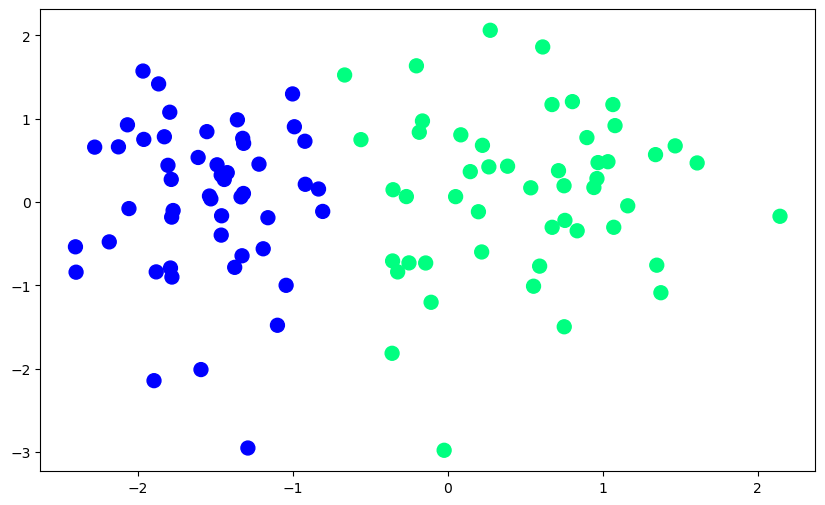

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap="winter",s=100)

In [91]:
def step(x):
    return 1 if x >= 0 else 0

In [92]:
def perceptron(x,y):
    
    X = np.insert(x,0,1,axis=1)   
    weight = np.ones(x.shape[1] + 1)  #-> number of features(100,2)
    lr = 0.1
    
    for _ in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weight))
        weight = weight + lr * (y[j]-y_hat)*X[j]
        
    return weight[0],weight[1:]

intercept_, coef_ = perceptron(x,y)

In [93]:
print(intercept_, " coeff" , coef_)

1.0  coeff [1.38751913 0.16719995]


In [94]:
m = -(coef_[0]/coef_[1])  #-a/b
b = -(intercept_/coef_[1]) #-c/b 

In [95]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

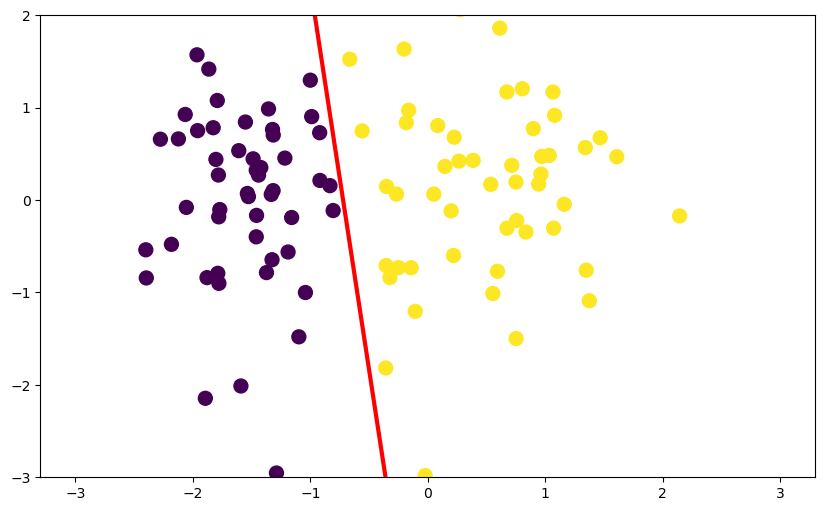

In [96]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color="red",linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,s=100)
plt.ylim(-3,2)

In [97]:
def perceptron(x,y):
    w1=w2=b=1
    lr = 0.1
    
    for j in range(1000):
        for i in range(x.shape[0]):
            z = w1 * x[i][0] + w2 * x[i][1] + b
            if y[i] * z < 0:
                w1 = w1 + lr* y[i]*x[i][0]
                w2 = w2 + lr * y[i]*x[i][1]
                b = b + lr * y[i]
                
    return w1,w2,b


In [110]:
y = np.where(y == 0, -1,1) 
w1,w2,b = perceptron(x,y)

In [103]:
m = -(w1/w2)
c = -(b/w2)
print(m , " ", c)

-13.096388513261017   -8.492852183439245


In [104]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

(-3.0, 2.0)

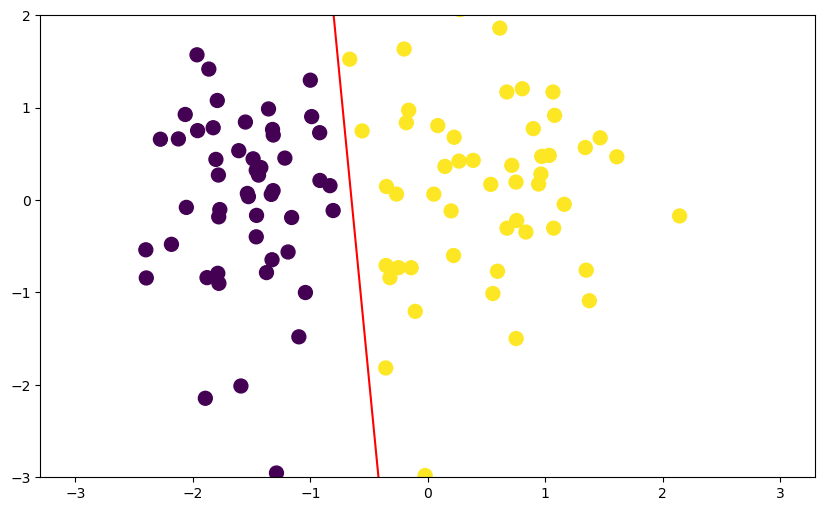

In [107]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color="red")
plt.scatter(x[:,0],x[:,1],c=y,s=100)
plt.ylim(-3,2)